# Wine Quality Analysis - Introduction


## Import Libraries

In [67]:
### Data and Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

### Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC


### Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

### Metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score

## Loading Dataset

In [68]:
uploaded = files.upload()

Saving winequality-white.csv to winequality-white (2).csv


In [69]:
df= pd.read_csv('winequality-white.csv', sep=';')
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Cleaning

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [71]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [72]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## Exploratory Data Analysis

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

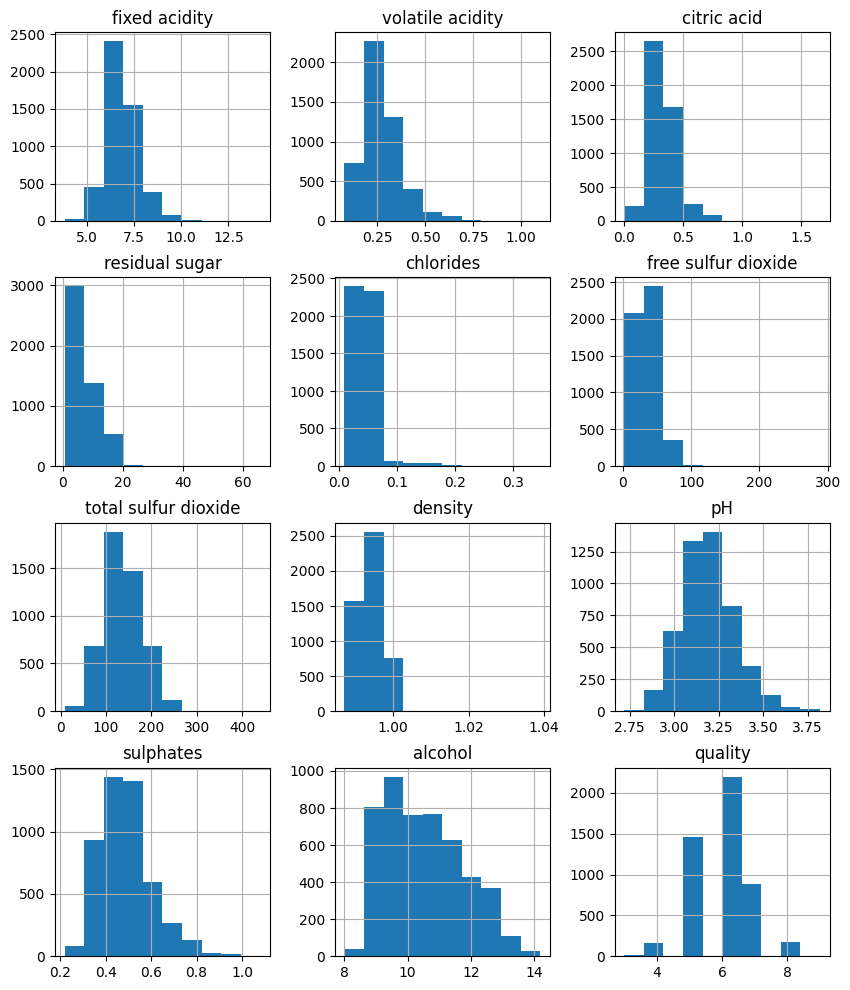

In [73]:
df.hist(figsize=(10,12))

In [74]:
df['quality'].value_counts().sort_index()

,count
quality,
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


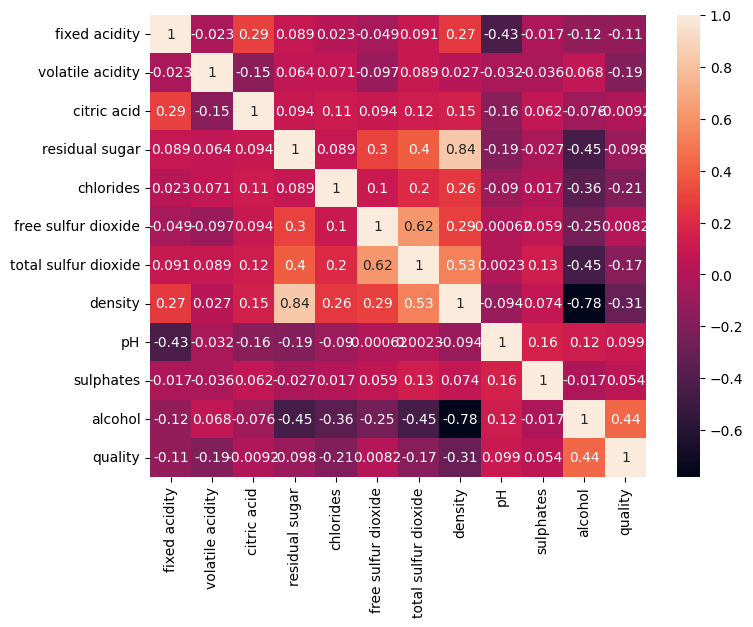

In [75]:
corr=df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True)
plt.show()

## Preprocessing

In [76]:
X= df.drop('quality', axis=1)
y = df['quality']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Why we scale the data:

* Many ML models (like Logistic Regression, SVM, Gradient Boosting) perform better when features are on similar scales.

* Some features in the wine dataset have very different ranges (e.g., residual sugar vs. fixed acidity).

* Scaling helps the model converge faster and prevents features with large values from dominating the learning process.

In [78]:
scaler= StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## Model Training

### Logistic Regression

In [79]:

lr= LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [80]:
print("Accuracy:", lr.score(X_test, y_test))
# the logistic regression is linear model and not suitable for a dataset such as the wine quality dataset.

Accuracy: 0.5530612244897959


### Decision Tree

In [81]:
dt= DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [82]:
print("Accuracy:", dt.score(X_test, y_test))

Accuracy: 0.5829931972789115


### SVM

In [93]:
# using GridSearchCV to find the best C and gamma values on rdf kernel

param_grid = {
    'C': [1, 5, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

svm = SVC()


grid = GridSearchCV(
    svm,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)

# Best model score (cross-val)
print("Best CV Accuracy:", grid.best_score_)

# Test set accuracy
svm = grid.best_estimator_
print("Test Accuracy:", svm.score(X_test, y_test))



/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy: 0.5703006958779341
Test Accuracy: 0.5836734693877551


In [94]:
print("Accuracy:", svm.score(X_test, y_test))

Accuracy: 0.5836734693877551


### Gradient Boosting

### Baseline Random Forest

In [83]:

rf_base = RandomForestClassifier(random_state=42)
rf_base.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
print("Accuracy:", rf_base.score(X_test, y_test))

Accuracy: 0.6775510204081633


In [85]:
cm= confusion_matrix(y_test, rf_base.predict(X_test))
print(cm)

[[  0   0   1   5   0   0   0]
 [  0  10  23  15   1   0   0]
 [  0   5 305 126   1   0   0]
 [  0   1  87 528  44   0   0]
 [  0   0   5 129 128   2   0]
 [  0   0   0  15  13  25   0]
 [  0   0   0   0   1   0   0]]


In [86]:
cr= classification_report(y_test, rf_base.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.62      0.20      0.31        49
           5       0.72      0.70      0.71       437
           6       0.65      0.80      0.71       660
           7       0.68      0.48      0.57       264
           8       0.93      0.47      0.62        53
           9       0.00      0.00      0.00         1

    accuracy                           0.68      1470
   macro avg       0.51      0.38      0.42      1470
weighted avg       0.68      0.68      0.67      1470



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [87]:
rf_base.feature_importances_

array([0.0752379 , 0.10272998, 0.0838165 , 0.08891789, 0.08518273,
       0.09001764, 0.09141812, 0.09939276, 0.08797187, 0.07970253,
       0.11561208])

In [95]:
model5 = GradientBoostingClassifier(random_state=42)
model5.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [96]:
print("Accuracy", model5.score(X_test, y_test))

Accuracy 0.5775510204081633


### Tuned Random Forest

In [88]:
#### Tuned Random Forest (Accuracy)

param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [12, 15],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_tuned = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf_tuned,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)
print("Test Accuracy:", grid_rf.best_estimator_.score(X_test, y_test))


Best Parameters: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best CV Accuracy: 0.6400210627495264
Test Accuracy: 0.6653061224489796


In [89]:
#### Tuned Random Forest (F1-Macro)

param_grid = {
    'n_estimators': [150, 300],
    'max_depth': [15],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

rf_tuned = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf_tuned,
    param_grid,
    cv=3,
    scoring='f1_macro',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV F1-Macro:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

print("Test F1-Macro:", f1_score(y_test, y_pred, average='macro'))
print("Test Accuracy:", best_rf.score(X_test, y_test))


Best Parameters: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best CV F1-Macro: 0.3759728939058786
Test F1-Macro: 0.4152401497338719
Test Accuracy: 0.6428571428571429


In [90]:
# Final Random Forest

param_grid = {
    'n_estimators': [150],
    'max_depth': [15],
    'min_samples_split': [3],
    'min_samples_leaf': [1],
    'class_weight': ['balanced']
}

rf_final = RandomForestClassifier(random_state=42)

grid_rf = GridSearchCV(
    rf_final,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)
print("Best CV Accuracy:", grid_rf.best_score_)
print("Test Accuracy:", grid_rf.best_estimator_.score(X_test, y_test))


Best Parameters: {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
Best CV Accuracy: 0.6411865621292376
Test Accuracy: 0.6680272108843538


In [91]:
cm= confusion_matrix(y_test, grid_rf.predict(X_test))
print(cm)

[[  0   0   2   3   1   0   0]
 [  0   8  25  16   0   0   0]
 [  1   3 320 106   7   0   0]
 [  0   1 118 480  61   0   0]
 [  0   0   7 105 149   3   0]
 [  0   0   0  11  17  25   0]
 [  0   0   0   0   1   0   0]]


In [92]:
cr= classification_report(y_test, grid_rf.predict(X_test))
print(cr)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.67      0.16      0.26        49
           5       0.68      0.73      0.70       437
           6       0.67      0.73      0.70       660
           7       0.63      0.56      0.60       264
           8       0.89      0.47      0.62        53
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1470
   macro avg       0.50      0.38      0.41      1470
weighted avg       0.67      0.67      0.66      1470



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Model Comparison Table
| Model                    | Accuracy |
|-------------------------|----------|
| Logistic Regression     | 0.5530   |
| Decision Tree           | 0.5829   |
| SVM (tuned)             | 0.5836   |
| Gradient Boosting       | 0.5775   |
| Random Forest (baseline)| 0.6775    |
| Random Forest (final)   | 0.6680    |


## Conclusion
Random Forest was the best-performing algorithm for wine quality prediction, achieving an accuracy of 0.678.
Hyperparameter tuning (depth, number of trees, and class balancing) produced only marginal changes, confirming that the default Random Forest configuration was already close to optimal for this noisily labeled and highly imbalanced dataset.

While the model performs well for the dominant classes (5, 6, 7), minority classes (3, 4, 9) remain difficult to predict, a limitation caused by the dataset itself, not the model.

Overall, Random Forest provides a stable and reliable performance on this dataset and is chosen as the final model for wine quality classification.